# Øving 2, TMA4320

* **Veiledning:** Foregår via Mattelab og Zoom, torsdag 27.01 kl. 10.15-12.00 og fredag 28.01 kl.08.15-10.00  vil det være opplegg for å melde inn ønske om Zoom-veiledning, følg med på Mattelab for organisering av dette.
* **Innleveringsfrist:** Mandag 31.01, kl. 23.59.
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på skjema med kontrollspørsmål under Øving 1 i Blackboard (minst 8 av 10 spørsmål må være riktige for godkjenning)
    
    
Teorien brukt i denne øvingen finner du i notatet

* [Numerical Solution of Nonlinear Equations](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/NonLinearEquations.ipynb) 
* [Polynomial Interpolation](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/PolynomialInterpolation.ipynb)


In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

**Oppgave 1**
Gitt det ikke-lineære ligningssystemet $\mathbf{F}(\mathbf{x})=0$, skrevet ut som

$$
\begin{align*}
x_1^3+x_1^2x_2 - x_1x_3+6 &= 0 \\
e^{x_1}+e^{x_2} - x_3 &= 0 \\
x_2^2-2x_1x_3-4 &= 0
\end{align*}
$$
Denne skal løses vha. av Newtons metode. Bruk $\mathbf{x}_{0} = [-1, -2, 1]^T$ som startverdi. 

**Oppgave 1a:** Sett opp Jacobimatrisa $J(\mathbf{x})$ til $\mathbf{F}(\mathbf{x})$. 

**Kontrollspørsmål 1:** Hva er $J_{11}(\mathbf{x_0})$ ? 

**Oppgave 1b:**
Løs ligningen med Newton's metode for systemer. Bruk gjerne koden fra notatet.

**Kontrollspørsmål 2:** Hva er det første elementet i $\mathbf{x}_5$, altså resultatet etter 5 iterasjoner? Oppgi svaret med minst 6 sifre. 

In [2]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print(f"k = {0:3d}, x = {x}")
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, np.inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print(f"k = {k+1:3d}, x = {x}")
    return x, k

def f(x):
    y = np.array([x[0]**3+x[0]**2*x[1]-x[0]*x[2] + 6, 
                  np.exp(x[0])+np.exp(x[1])-x[2], 
                  x[1]**2-2*x[0]*x[2]-4])
    return y
def jac(x): 
    J = np.array([[3*x[0]**2 + 2*x[0]*x[1] - x[2], x[0]**2, -x[0]],
                  [np.exp(x[0]), np.exp(x[1]), -1],
                  [-2*x[2], 2*x[1], -2*x[0]]])
    return J
    
x0 = np.array([-1, -2, 1])

print(jac(x0))

x, nit = newton_system(f, jac, x0, tol=1.e-10)

[[ 6.          1.          1.        ]
 [ 0.36787944  0.13533528 -1.        ]
 [-2.         -4.          2.        ]]
k =   0, x = [-1 -2  1]
k =   1, x = [-1.63673833 -1.51427723  0.33470721]
k =   2, x = [-1.4648569  -1.66823198  0.4141664 ]
k =   3, x = [-1.45610741 -1.66419105  0.42247539]
k =   4, x = [-1.4560428  -1.66423047  0.4224934 ]
k =   5, x = [-1.4560428  -1.66423047  0.4224934 ]


**Oppgave 2**

Denne oppgaven dreier seg om polynominterpolasjon. Bruk penn og papir til å finne svarene. 

La følgende interpolasjonsdata være gitt

$$
 \begin{array}{|r||r|r|r|r|}
 \hline
 x_i & 0 & 1 & 2 & 4 \\ \hline
 y_i & 1 & 5 & 11 & 5 \\ \hline
 \end{array}
$$
  
Bestem Lagrangefunksjonene $\ell_i(x),\ i=0,\ldots,3$ og bestem interpolasjonspolynomet $p_3(x)$ av grad 3.

**Kontrollspørsmål 3:**
Hva er koeffisienten foran $x^2$ i $\ell_0$? 

**Kontrollspørsmål 4:**
Hva er koeffisienten foran $x$ i $\ell_1$? 

**Kontrollspørsmål 5:**
Hva er koeffisienten foran $x$ i $\ell_2$? 

**Kontrollspørsmål 6:**
Hva er koeffisienten foran $x^2$ i $\ell_3$?

**Kontrollspørsmål 7:**
Hva er koeffisienten foran $x^3$ i $p_3$? 

**Løsning oppgave 2.** 

**Løsning 2a.**
$$
\ell_0(x) = -\frac18 x^3+\frac78 x^2 - \frac74 x + 1,\quad
\ell_1(x) =\frac13 x^3-2 x^2+\frac83\,x ,\quad
\ell_2(x) =-\frac14 x^3 + \frac54 x^2 - x,\quad
\ell_3(x) = \frac1{24} x^3-\frac18 x^2+ \frac1{12} x
$$

Interpolasjonspolynomet blir

$$
    p_3(x) = -x^3 + 4 x^2 + x + 1
$$

**Oppgave 3**
 
Kvadratrotfunksjonen, $f(x)=\sqrt{x}$ skal approksimeres med lineær interpolasjon med hensyn på abscissene
$x_0=\frac14$ og $x_1=1$.

*Kommentar.* Klassiske biblioteksrutiner for beregning av $\sqrt{x}$ gjør følgende: Først skalerer de argumentet $x$ ved å skrive det på formen $x=2^{2m}y$ der $m$ er et heltall og $\leq\frac14\leq y<1$ slik at $\sqrt{x}=2^m\sqrt{y}$. Man kan så bruke Newtoniterasjon på $f(z)=z^2-y=0$ som tar formen $z_{k+1}=\frac12(z_k+\frac{y}{z_k})$. Men $z_0$ må bestemmes. Da kan man for eksempel benytte interpolasjon slik vi gjør her, og feilskranke er viktig.
 
**Oppgave 3a.** Finn det lineære interpolasjonspolynomet $p(x)$ som interpolerer $f(x)$ i abscissene $x_0$ og $x_1$.

**Kontrollspørsmål 8.** Angi $p(\frac12)$.

**Løsning 3a.** (fyll inn din løsning her)

$p(x)=\frac23 x + \frac13$

**Oppgave 3b.** Bruk den generelle feilformelen for interpolasjon til å lage en øvre skranke for feilen.
Gjør dette ved først å bestemme $M=\max_{t\in[\frac14,1]} |f''(t)|$, og deretter finne maximum av absoluttverdien til
datapolynomet $(x-x_0)(x-x_1)$.</div>

**Kontrollspørsmål 9.** Finn feilskranken.

**Løsning 3b.** 
Med $f(x)=\sqrt(x)=x^{1/2}$ fås
$$
f''(t) = -\frac14 t^{-3/2}
$$
Vi ser at $|f''(t)|$ er avtagende for alle $t>0$ så maksverdien inntreffer i $t=\frac14$. Vi finner at
$M=\frac14\left(\frac14\right)^{-3/2}=2$. Vi finner også 
$$
\max_{x\in[\frac14,1]} |(x-\frac14)(x-1)|=\frac{9}{64}\approx 0.1406
$$
Til slutt får vi da skranken for interpolasjonsfeilen
$$
|f(x)-P(x)| \leq \frac{M}{(1+1)!} \max_{x\in[\frac14,1]}|(x-\frac14)(x-1)| = \frac{2}{2}\cdot\frac{9}{64}\approx 0.1406
$$

**Oppgave 3c.** Finn deretter eksakt maksimalfeil $\max_{x\in[\frac14,1]} |f(x)-P(x)|$ og sammenlign denne med skranken fra **2b.** 

**Kontrollspørsmål 10.** Angi denne maksimalfeilen som en brøk $\frac{p}{q}$ der $p$ og $q$ er relativt primiske heltall.

**Løsning 3c.** Dette er en god gammeldags funksjonsdrøftingsoppgave, vi bruker standard metodikk fra Matematikk 1 til å beregne ekstremalverdiene til

$$
%\max_{x\in[\frac14,1]}
e(x)=\sqrt{x}-(\frac23 x + \frac13)
$$

Endepunktene kan vi se bort fra så vi sjekker stasjonære punkter

$$
e'(x) = \frac12 x^{-1/2} - \frac23 = 0\quad\Rightarrow\quad x=\frac{9}{16},\quad |e(\frac{9}{16})|=\frac{1}{24}\approx
0.0417
$$

Så konklusjonen er at den virkelige feilen er litt mindre enn en tredjedel av skranken. Dette er kanskje ikke så galt.

**Oppgave 4:**
La $f(x)=e^{-x}$ være gitt på intervallet $[0,1]$. Funksjonen $f$ skal approximeres med et interpolasjonspolynom $p_n(x)$, med bruk av $n+1$ Chebyshev-noder. 

**Oppgave 4a:**
Finn et uttrykk for en øvre grense for feilen $\max_{x\in[0,1]}|f(x)-p(x)|$ når $n=4$.

**Løsning 4a:**
Vi har at $M=|\max_{x\in[0,1]}f^{(5)}(x)|=1$. Fra teoremet om interpolasjonsfeil i Chebyshev-interpolasjon har vi at
$$
\max_{x\in[0,1]}|f(x)-p_4(x)| \leq \frac{1}{2^9\cdot 5!}\cdot 1 = \frac{1}{61440} = 1.63 \cdot 10^{-5}. 
$$

**Oppgave 4b:**
Velg ulike $n$, og plott funksjonen og interpolasjonspolynomet vha. kodene i notatet om polynominterpolasjon. Plott feilen $f(x)-p_n(x)$ også, og mål $\max_{x\in[0,1]}|f(x)-p_4(x)|$. Sammenlign med svaret i oppgave 4a. 

Bruk `x=np.linspace(0,1,101)` i plottet, og også for å måle interpolasjonsfeilen. 

In [3]:
# Hentet fra notatet Polynomial Interpolation
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes in the interval [a, b] 
    i = np.array(range(n))                 # i = [0,1,2,3, ....n-1]
    x = np.cos((2*i+1)*np.pi/(2*(n)))         # nodes over the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a)           # nodes over the interval [a,b]

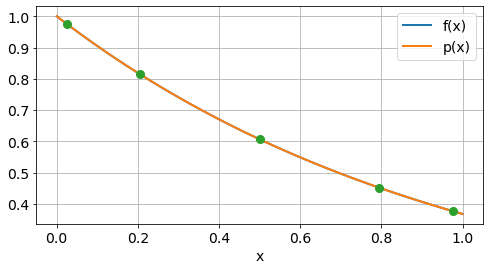

In [6]:
a = 0
b = 1
n = 4
xdata = chebyshev_nodes(a, b, n+1)
ydata = np.exp(-xdata)
x = np.linspace(a, b, 101)

l = cardinal(xdata, x)
p = lagrange(ydata, l)

plt.plot(x, np.exp(-x), label='f(x)')
plt.plot(x, p, label='p(x)')
plt.plot(xdata, ydata, 'o')
plt.legend();
plt.xlabel('x');

Maksimal feil = 1.0835806744324827e-05


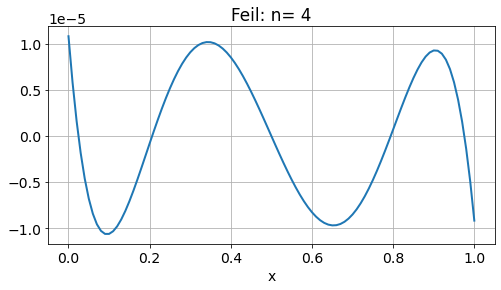

In [5]:
plt.plot(x, np.exp(-x)-p)
plt.title(f"Feil: n={n:2d}")
plt.xlabel('x')
print(f"Maksimal feil = {np.max(np.abs(np.exp(-x)-p))}")